In [1]:
# Dependencies
import requests
import json
from config import api_key
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Create a list of 500 random cities
coordinates = []
cities = []

# Create a set of random coordinates
latitude = np.random.uniform(low=-90, high=90, size=2000)
longitude = np.random.uniform(low=-180, high=180, size=2000)
coordinates = zip(latitude, longitude)

# Find the nearest city for each coordinate
for i in coordinates:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        if len(cities) < 500:
            cities.append(city)

print(f"There are {len(cities)} cities in the list")

There are 500 cities in the list


In [3]:
city_name = []
city_id = []
latitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []


##Is this the right URL?##
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "appid=" + api_key + "&units=imperial&q="


#Loop through the list of 500 random cities to store their details into the lists
for city in cities: 
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        latitude.append(response["coord"]["lat"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])  
        
    except(KeyError, IndexError):
        pass
    

In [4]:
#Create a dataframe using the variables from the previous cell
weather_dict = {
    "City Name": city_name,
    "City ID": city_id,
    "Latitude": latitude,
    "Temp (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City Name,City ID,Latitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,3833367,-54.80,28.40,100,20,2.24
1,Kapaa,5848280,22.08,73.62,78,40,13.87
2,Ribeira Grande,3372707,38.52,73.40,56,75,6.93
3,Avarua,4035715,-21.21,71.60,94,100,18.34
4,Tiksi,2015306,71.69,51.01,87,100,3.65


## Scatter Plots

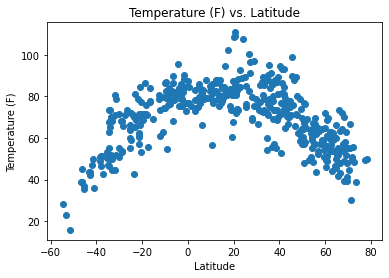

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Temp (F)']
plt.scatter(x_values,y_values)
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

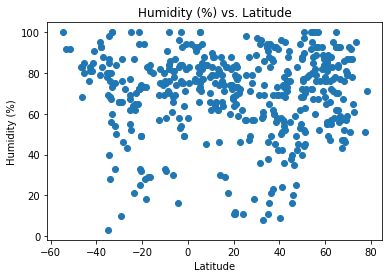

In [6]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Humidity (%)']
plt.scatter(x_values,y_values)
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

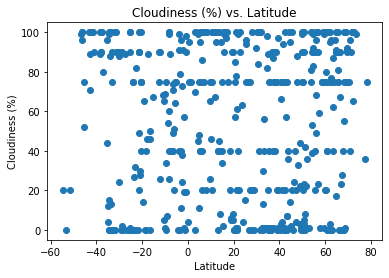

In [7]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness (%)']
plt.scatter(x_values,y_values)
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

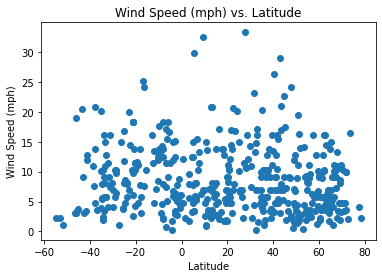

In [8]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression